In [1]:
# importing modules

import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# # uploading the datasheets 
# from google.colab import files
# upload = files.upload() # upload files

In [3]:
# reading the datasheets into data files(df1 to df8)
df1 = pd.read_csv('Ahmedabad_rent.csv')
df2 = pd.read_csv('Bangalore_rent.csv')
df3 = pd.read_csv('Chennai_rent.csv')
df4 = pd.read_csv('Delhi_rent.csv')
df5 = pd.read_csv('Hyderabad_rent.csv')
df6 = pd.read_csv('Kolkata_rent.csv')
df7 = pd.read_csv('Mumbai_rent.csv')
df8 = pd.read_csv('Pune_rent.csv')

# Performing EDA on original data.

In [4]:
dfs=[df1,df2,df3,df4,df5,df6,df7,df8] # creating a list of all datafiles to create a merged datafile
cities= ['Ahmedabad','Bangalore','Chennai','Delhi','Hyderabad','Kolkata','Mumbai','Pune']

# printing the data size available for each city
for df,city in zip(dfs,cities):
    df['city']=city
    print(city,df.shape)

Ahmedabad (18540, 10)
Bangalore (23540, 10)
Chennai (9283, 10)
Delhi (33500, 10)
Hyderabad (10757, 10)
Kolkata (9900, 10)
Mumbai (68518, 10)
Pune (22800, 10)


In [5]:
df_c = pd.concat(dfs) # concatenating the list into a combined datafile (df_c)
print(df_c.shape) # this shows that all datafiles are
df_c.head()
# printing first 5 rows of the new data file to show that city column is added

(196838, 10)


,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,"20,000",1450.0,Furnished,2 bathrooms,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,"7,350",210.0,Semi-Furnished,1 bathrooms,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,"22,000",1900.0,Unfurnished,3 bathrooms,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,"13,000",1285.0,Semi-Furnished,2 bathrooms,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,"18,000",1600.0,Furnished,2 bathrooms,Ahmedabad


# Observation
### 'city' column is added.

In [6]:
df_c.info() # printing the number of non null values and datatype for each columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196838 entries, 0 to 22799
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    195774 non-null  object 
 1   bedroom        195777 non-null  float64
 2   layout_type    195777 non-null  object 
 3   property_type  195777 non-null  object 
 4   locality       195776 non-null  object 
 5   price          195777 non-null  object 
 6   area           195777 non-null  float64
 7   furnish_type   195777 non-null  object 
 8   bathroom       193480 non-null  object 
 9   city           196838 non-null  object 
dtypes: float64(2), object(8)
memory usage: 16.5+ MB


In [7]:
# replacing the null values in each column by np.nan and then removing them from the columns
df_c = df_c.replace('', np.nan) 
df_c = df_c.dropna()
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193476 entries, 0 to 22799
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    193476 non-null  object 
 1   bedroom        193476 non-null  float64
 2   layout_type    193476 non-null  object 
 3   property_type  193476 non-null  object 
 4   locality       193476 non-null  object 
 5   price          193476 non-null  object 
 6   area           193476 non-null  float64
 7   furnish_type   193476 non-null  object 
 8   bathroom       193476 non-null  object 
 9   city           193476 non-null  object 
dtypes: float64(2), object(8)
memory usage: 16.2+ MB


In [8]:
df_c.bathroom.value_counts() # printing the frequency of each dataset in 'bathroom' column

2 bathrooms                 90044
1 bathrooms                 54282
3 bathrooms                 35452
4 bathrooms                 10674
5 bathrooms                  1929
6 bathrooms                   381
East facing                   169
7 bathrooms                    80
North facing                   66
9 bathrooms                    55
8 bathrooms                    52
NorthEast facing               51
10 bathrooms                   34
West facing                    31
Grfloor                        19
NorthWest facing               17
SouthWest facing               15
1 of 4floor                    13
SouthEast facing               10
15 bathrooms                    8
2 of 4floor                     8
South facing                    6
14 bathrooms                    6
16 bathrooms                    6
3 of 4floor                     5
1 of 3floor                     5
3 of 3floor                     5
12 bathrooms                    5
Family only                     4
2 of 5floor   

In [9]:
df_c = df_c[df_c.bathroom.str.contains('bathrooms')] # filtering out those values which contain the text "bathrooms" 

In [10]:
#creating a new column which indicates whether price dataset contains a ',' or not, 1 for not and 0 for yes
df_c['comma_check'] = df_c['price'].apply(lambda x : '0' if ',' in x else '1') 
df_c.head(3) 

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,comma_check
0,OWNER,2.0,BHK,Apartment,Bodakdev,"20,000",1450.0,Furnished,2 bathrooms,Ahmedabad,0
1,OWNER,1.0,RK,Studio Apartment,CG Road,"7,350",210.0,Semi-Furnished,1 bathrooms,Ahmedabad,0
2,OWNER,3.0,BHK,Apartment,Jodhpur,"22,000",1900.0,Unfurnished,3 bathrooms,Ahmedabad,0


# Observation
## 'comma_check' column is added.

In [11]:
pf=df_c.loc[df_c['comma_check']=='1'] # Filtering the column if the value of comma_checker is 1
print(pf)



      seller_type  bedroom layout_type      property_type       locality  \
25          AGENT      4.0         BHK          Apartment      Satellite   
419         AGENT      4.0         BHK          Apartment      Satellite   
420         AGENT      4.0         BHK          Apartment      Satellite   
421         AGENT      4.0         BHK          Apartment      Satellite   
422         AGENT      4.0         BHK          Apartment      Satellite   
...           ...      ...         ...                ...            ...   
18518       AGENT      4.0         BHK          Apartment  Koregaon Park   
19357       OWNER      3.0         BHK          Apartment  Kalyani Nagar   
19739       OWNER      4.0         BHK          Apartment          Baner   
22542       OWNER      4.0         BHK  Independent House  Koregaon Park   
22641       OWNER      4.0         BHK  Independent House  Koregaon Park   

      price    area    furnish_type     bathroom       city comma_check  
25      1.1  

# Observation
### The prices are in lakhs where comma_check is 1.

In [12]:
df_c['price'] = df_c['price'].str.replace(',', '', regex=True) # removing "," from price and "bathrooms" from bathroom
df_c['bathroom'] = df_c['bathroom'].str.replace('bathrooms', '', regex=True) 
df_c.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,comma_check
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000,1450.0,Furnished,2,Ahmedabad,0
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350,210.0,Semi-Furnished,1,Ahmedabad,0
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000,1900.0,Unfurnished,3,Ahmedabad,0
3,OWNER,2.0,BHK,Independent House,Sanand,13000,1285.0,Semi-Furnished,2,Ahmedabad,0
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000,1600.0,Furnished,2,Ahmedabad,0


In [13]:
# replacing the null values in each column by np.nan and then removing them from the columns
df_c=df_c.replace('', np.nan)
df_c=df_c.dropna()
df_c.shape

(193011, 11)

In [14]:
# changing the datatype of bathroom and price from object to float64
df_c['bathroom'] = df_c['bathroom'].astype('float64', errors = 'raise')
df_c['price'] = df_c['price'].astype('float64', errors = 'raise')



In [15]:
# for the values in 'prices' column where unit is lakhs , we are multplying those by 100000
df_c.loc[df_c.comma_check.str.contains('1'), 'price'] *= 100000.0 
df_c.drop('comma_check',axis=1,inplace=True) #removing the comma_check column 
df_c.head() # seeing new df

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [16]:
df_c.describe()  #printing some standard central values of the numerical columns

,bedroom,price,area,bathroom
count,193011.000000,1.930110e+05,193011.000000,193011.000000
mean,2.081679,4.433654e+04,1264.604468,2.059883
std,0.956901,9.195199e+04,1043.725561,0.934805
min,1.000000,1.200000e+03,3.000000,1.000000
25%,1.000000,1.300000e+04,650.000000,1.000000
50%,2.000000,2.100000e+04,1000.000000,2.000000
75%,3.000000,3.600000e+04,1440.000000,3.000000
max,15.000000,5.885000e+06,19800.000000,19.000000


In [17]:
df_c.bathroom.value_counts() #Checking distinct values in "bathroom" column and their frequency, after updating

2.0     90044
1.0     54282
3.0     35452
4.0     10674
5.0      1929
6.0       381
7.0        80
9.0        55
8.0        52
10.0       34
15.0        8
16.0        6
14.0        6
12.0        5
19.0        2
18.0        1
Name: bathroom, dtype: int64

In [18]:
# replacing the null values in each column by np.nan and then removing them from the columns
df_c=df_c.replace('', np.nan)
df_c=df_c.dropna()
df_c.shape

(193011, 10)

In [19]:
# Removing the outliers using Interquartile Range for all columns

def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
      
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
      
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

out_columns = df_c[['price', 'area']]  
for i in out_columns:
    removeOutliers(df_c, i)
  
# Assigning filtered data back to our original variable'

df_c = filtered_data
print("Shape of data after outlier removal is: ", df_c.shape)

IQR value for column price is: 23000.0
IQR value for column area is: 790.0
Shape of data after outlier removal is:  (179806, 10)


In [20]:
df_c.describe() 

,bedroom,price,area,bathroom
count,179806.000000,179806.000000,179806.000000,179806.000000
mean,1.945903,28110.938600,1038.573474,1.919335
std,0.797429,30985.761132,483.191556,0.753306
min,1.000000,1200.000000,3.000000,1.000000
25%,1.000000,12500.000000,650.000000,1.000000
50%,2.000000,20000.000000,995.000000,2.000000
75%,2.000000,32000.000000,1300.000000,2.000000
max,7.000000,700000.000000,2622.000000,8.000000


In [21]:
# creating a separate column containing log of prices to get better plots otherwise the plots were cluttered
df_c['log_price'] = df_c.apply(lambda row: math.log(row['price']), axis = 1)
df_c['Affordability'] = df_c.apply(lambda row: (row['price']/row['area']), axis = 1)
df_c.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,log_price,Affordability
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad,9.903488,13.793103
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad,8.902456,35.000000
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad,9.998798,11.578947
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad,9.472705,10.116732
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad,9.798127,11.250000


# Observation
## 'log_price' column is added.

<AxesSubplot:xlabel='city', ylabel='log_price'>

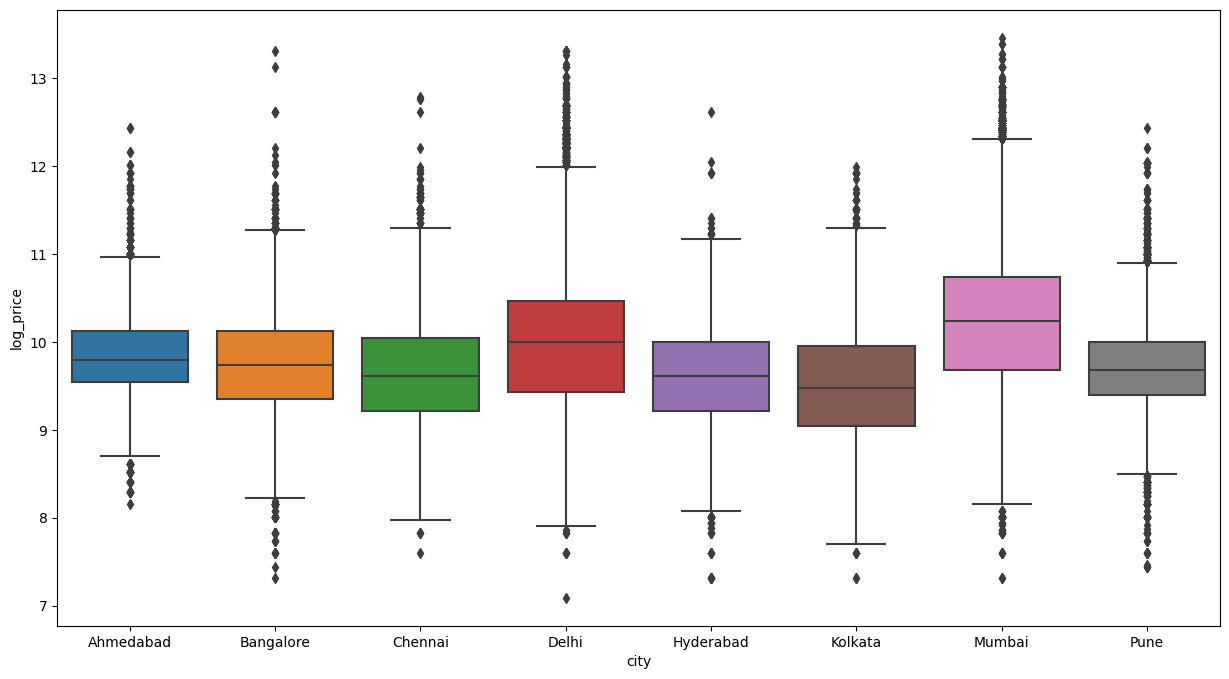

In [22]:
# plotting box and whiskers of log of prices against cities
figure = plt.figure(figsize=(15,8))
sns.boxplot(x='city',y='log_price',data=df_c)

<AxesSubplot:xlabel='seller_type', ylabel='log_price'>

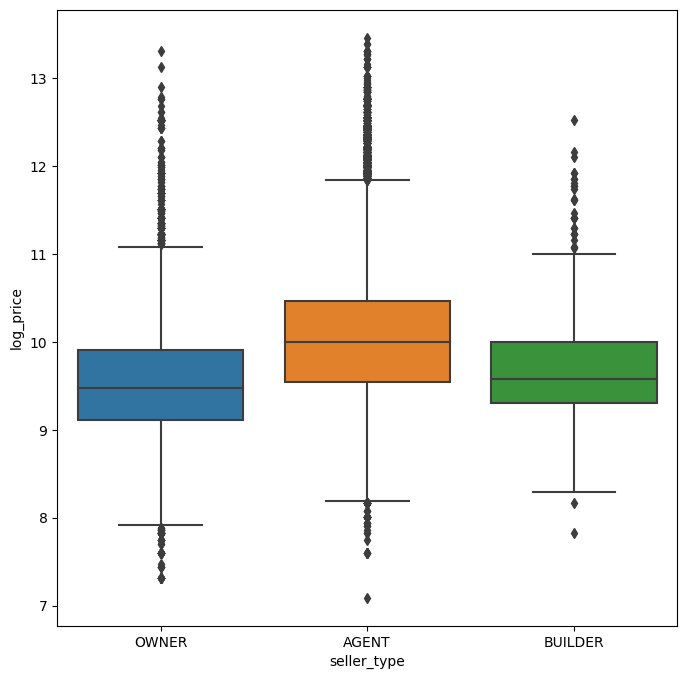

In [23]:
# plotting box and whiskers of log of prices against types of sellers
figure = plt.figure(figsize=(8,8))
sns.boxplot(x='seller_type',y='log_price',data=df_c)

<AxesSubplot:xlabel='furnish_type', ylabel='log_price'>

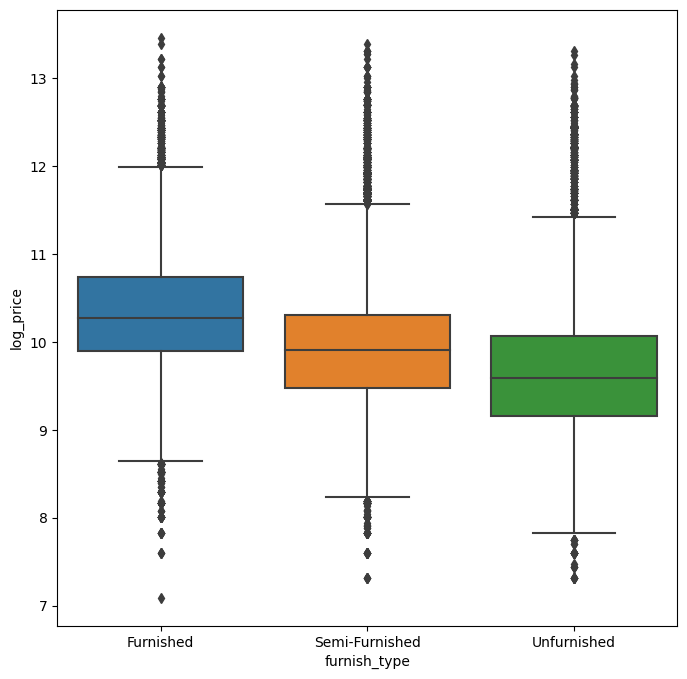

In [24]:
# plotting box and whiskers of log of prices against furnish type
figure = plt.figure(figsize=(8,8))
sns.boxplot(x='furnish_type',y='log_price',data=df_c)

<AxesSubplot:xlabel='bedroom', ylabel='log_price'>

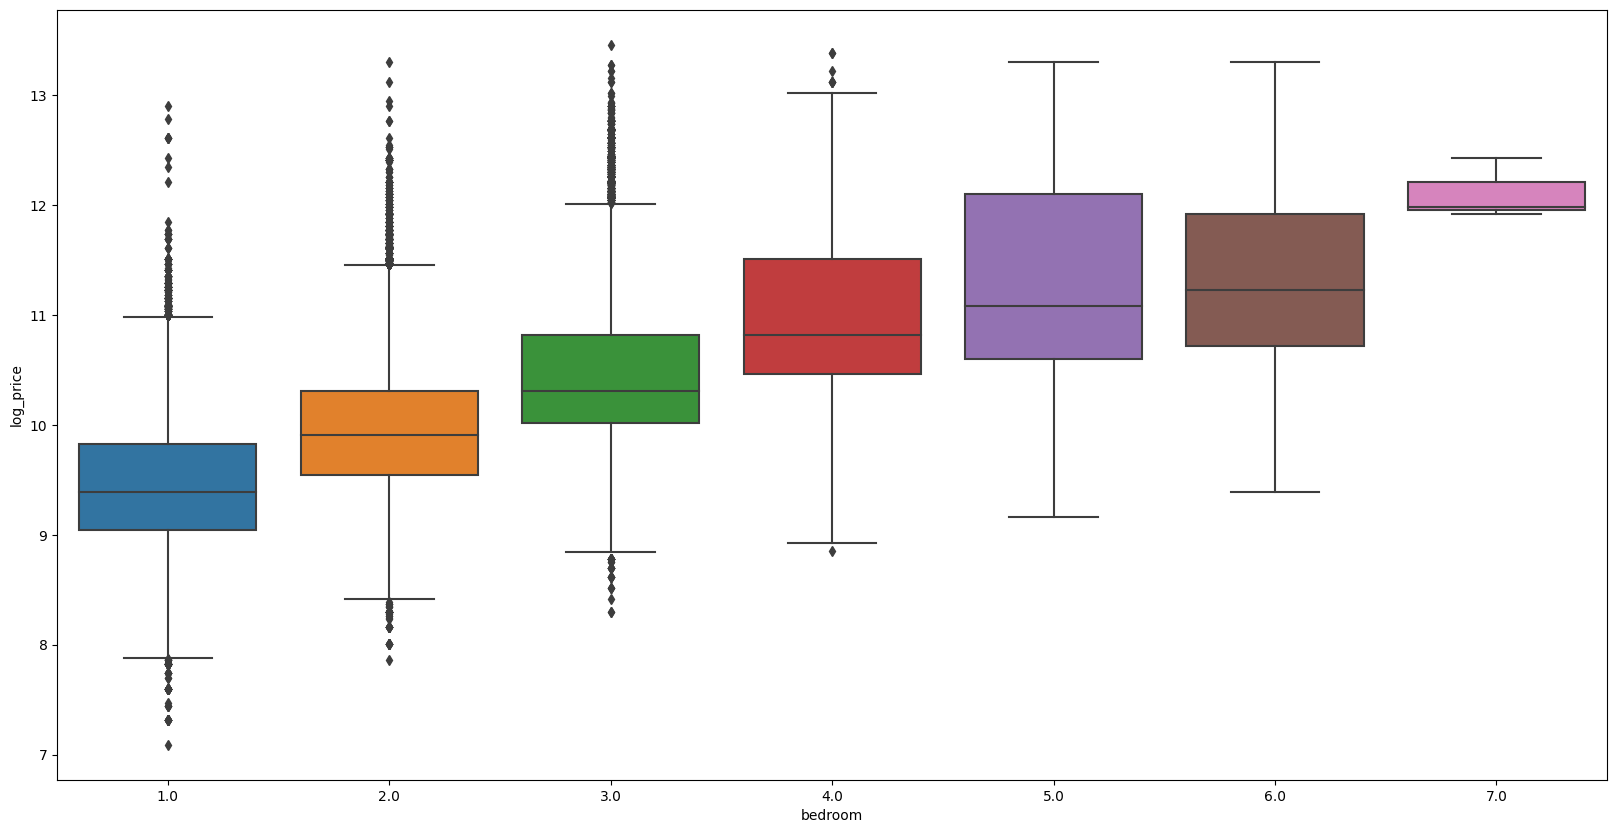

In [25]:
# plotting box and whiskers of log of prices against number of bedrooms
plt.figure(figsize=(20,10))
sns.boxplot(x="bedroom", y="log_price", data=df_c)

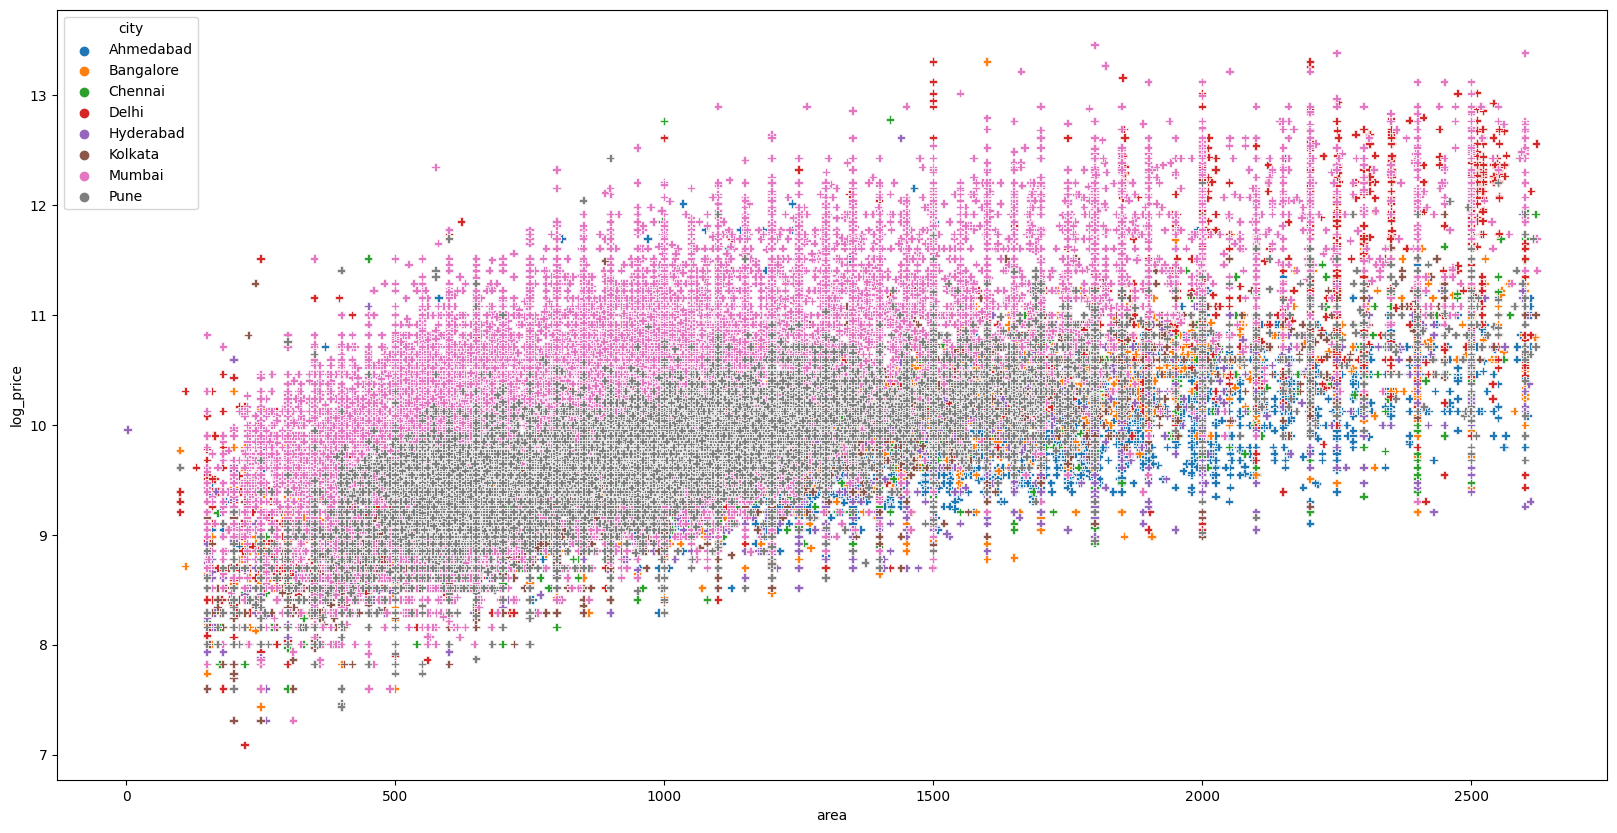

In [26]:
# plotting scatter plot to denote the variation in prices across different cities based on area
sns.scatterplot(x="area", y="log_price", data=df_c, marker="P", hue="city")
plt.gcf().set_size_inches(20,10)
plt.show()

# Code for ML

In [27]:
rent=df_c.copy() # creating a copy of original dataframe to make some changes for ML

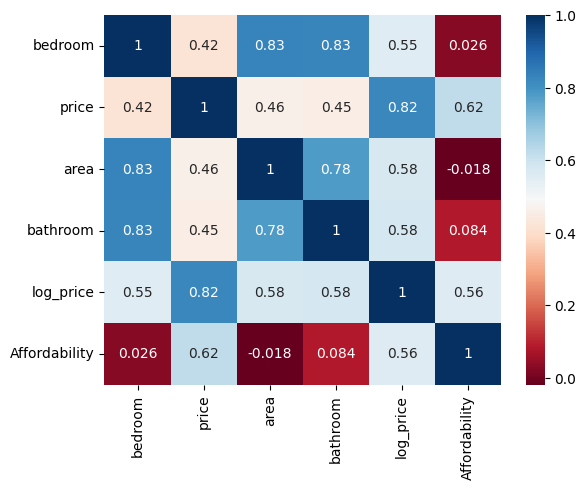

In [28]:
sns.heatmap(rent.corr(), annot=True, cmap="RdBu") # plotting a correlation matrix
plt.show()

In [29]:
rent=rent.drop(['locality','log_price','Affordability'],axis=1) # Dropping 'locality' and 'log_price' columns for further ML

In [30]:
rent.head()

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,18000.0,1600.0,Furnished,2.0,Ahmedabad


# Observation
### 'locality' and 'log_price' columns have been dropped.

# Creating dummies for categorical features

In [31]:
rent=pd.get_dummies(rent,columns=['seller_type','layout_type', 'property_type','furnish_type', 'city'],drop_first=True) # creating dummy columns to implement ML
rent.head()

,bedroom,price,area,bathroom,seller_type_BUILDER,seller_type_OWNER,layout_type_RK,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,...,property_type_Villa,furnish_type_Semi-Furnished,furnish_type_Unfurnished,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_Pune
0,2.0,20000.0,1450.0,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,7350.0,210.0,1.0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3.0,22000.0,1900.0,3.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2.0,13000.0,1285.0,2.0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,2.0,18000.0,1600.0,2.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Performing Train-Test Split

In [32]:
from sklearn.model_selection import train_test_split
# creating two dataframes x and y in which x contains the parameter and y contains the data to be predicted
X=rent.drop(columns=['price'],axis=1) 
y=rent['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # separating test and train data

In [33]:
#  printing shape of test as well as train data
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (125864, 20)
x test:  (53942, 20)
y train:  (125864,)
y test:  (53942,)


# Applying regression models
### Linear Regression (OLS)
### Ridge Regression
### Lasso Regression

In [34]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

Crossv = []
R2_train = []
R2_test = []

def the_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=3)
    cv_mean = cross_val.mean()
    Crossv.append(round(cv_mean,2))
    
    # Calculating mean absolute error
    mae = metrics.mean_absolute_error(y_test,y_pred_test)
    
    # Calculating root mean squared error
    rmse = math.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
    
    
    # Printing results
    print("R2 score of train set :",round(R2_train_model,2))
    print("R2 score of test set :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    print("Mean absolute error :", round(mae,5))
    print("Root mean squared error :", round(rmse,5))
   
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

## Linear Regression (OLS)

R2 score of train set : 0.41
R2 score of test set : 0.42
Train CV scores : [0.40643902 0.40717574 0.4143386 ]
Train CV mean : 0.41
Mean absolute error : 13010.93883
Root mean squared error : 23041.75169


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


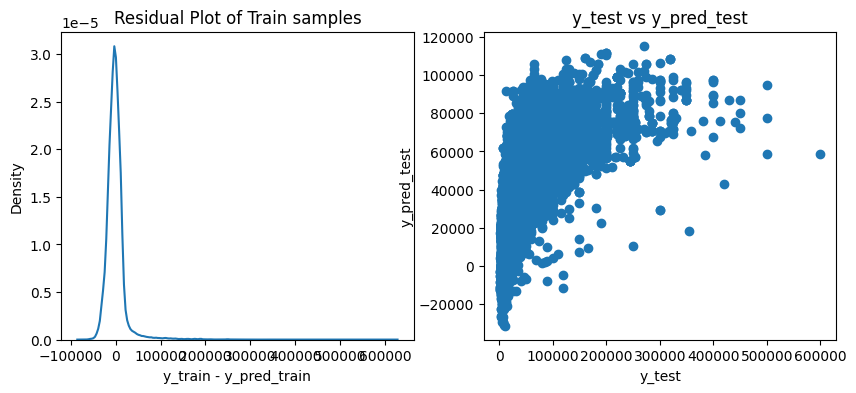

In [35]:
# Applying Linear Regression
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
the_model(linear_reg,"Linear_regressor.pkl")

### y_test vs y_pred_test is deviated from an ideal straight line, thus the model is inaccurate.

## Ridge Regression

R2 score of train set : 0.41
R2 score of test set : 0.42
Train CV scores : [0.40644061 0.40718516 0.41429862]
Train CV mean : 0.41
Mean absolute error : 13008.67732
Root mean squared error : 23041.6797


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


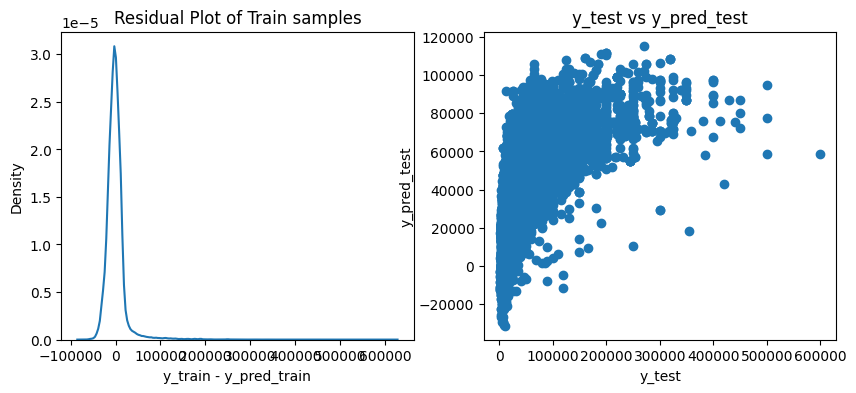

In [36]:
# Applying Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

the_model(rg_rs,"ridge.pkl")

### y_test vs y_pred_test is deviated from an ideal straight line, thus the model is inaccurate.

## Lasso Regression

R2 score of train set : 0.41
R2 score of test set : 0.42
Train CV scores : [0.40643903 0.40716672 0.41430226]
Train CV mean : 0.41
Mean absolute error : 13010.20553
Root mean squared error : 23041.70804


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


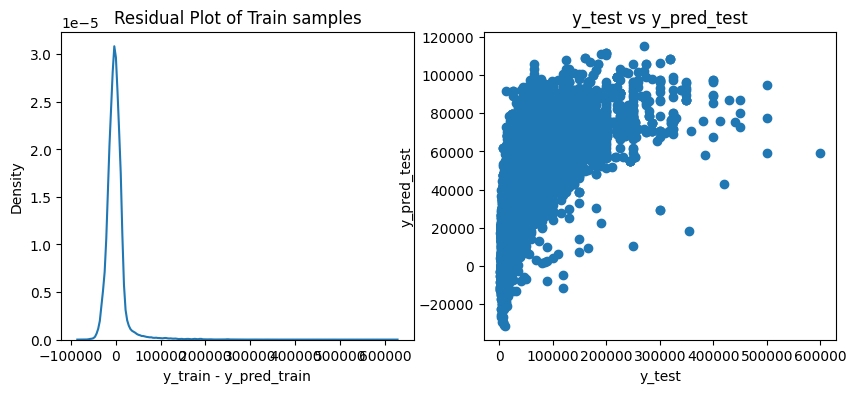

In [37]:
# Applying Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

the_model(ls_rs,"lasso.pkl")

### y_test vs y_pred_test is deviated from an ideal straight line, thus the model is inaccurate.

In [38]:
Models = ["LinearRegression","Ridge","Lasso"]
result_table=pd.DataFrame({'Models': Models,'R2 Score(Train)': R2_train,'R2 Score(Test)': R2_test,'Train CV Mean': Crossv})
display(result_table)

,Models,R2 Score(Train),R2 Score(Test),Train CV Mean
0,LinearRegression,0.41,0.42,0.41
1,Ridge,0.41,0.42,0.41
2,Lasso,0.41,0.42,0.41


## All the regressions gave similar results but inaccurate. Thus, We need to apply higher Machine Learning Frameworks to get a better prediction model.

# Sources

### https://www.kaggle.com/datasets/saisaathvik/house-rent-prices-of-metropolitan-cities-in-india
### https://www.kaggle.com/code/saisaathvik/rent-price-prediction-for-all-cities
### https://www.kaggle.com/code/rajpraveenpradhan/cp-prediction-with-model-comparision-deployment